In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('ReplicatedAcousticFeatures-ParkinsonDatabase (1).csv')
df.head()

,ID,Recording,Status,Gender,Pitch Local,Shim Loc,Amplitude,Harmonic,RPDE,DFA,PPE,GNE,MFCC,Delta
0,CONT-01,1,0,1,0.064654,0.030256,0.070478,69.444370,0.250433,0.599346,0.005397,0.900404,1.318551,1.404508
1,CONT-01,2,0,1,0.093459,0.023146,0.053850,71.426435,0.271445,0.581242,0.075617,0.887042,1.284004,1.318490
2,CONT-01,3,0,1,0.059513,0.019338,0.044642,70.156291,0.203531,0.600759,0.005283,0.889399,1.338276,1.354933
3,CONT-02,1,0,0,0.073942,0.024716,0.056437,75.863575,0.261360,0.625216,0.030518,0.875984,1.555013,1.484138
4,CONT-02,2,0,0,0.058310,0.013119,0.031014,82.083492,0.222069,0.602493,0.035602,0.902206,1.468737,1.492090


In [5]:
df['Status'].value_counts()

1    120
0    120
Name: Status, dtype: int64

In [6]:
df.columns

Index(['ID', 'Recording', 'Status', 'Gender', 'Pitch Local', 'Shim Loc',
       'Amplitude', 'Harmonic', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC', 'Delta'],
      dtype='object')

In [29]:
X = df[['Recording', 'Gender', 'Pitch Local', 'Shim Loc',
       'Amplitude', 'Harmonic', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC', 'Delta']] .values  #.astype(float)
X[0:5]

array([[1.00000000e+00, 1.00000000e+00, 6.46537450e-02, 3.02560000e-02,
        7.04782000e-02, 6.94443700e+01, 2.50432662e-01, 5.99346197e-01,
        5.39662400e-03, 9.00403826e-01, 1.31855079e+00, 1.40450769e+00],
       [2.00000000e+00, 1.00000000e+00, 9.34594910e-02, 2.31460000e-02,
        5.38502000e-02, 7.14264349e+01, 2.71444855e-01, 5.81242444e-01,
        7.56170040e-02, 8.87041519e-01, 1.28400354e+00, 1.31849039e+00],
       [3.00000000e+00, 1.00000000e+00, 5.95130770e-02, 1.93380000e-02,
        4.46416000e-02, 7.01562907e+01, 2.03530770e-01, 6.00759218e-01,
        5.28287400e-03, 8.89399386e-01, 1.33827612e+00, 1.35493296e+00],
       [1.00000000e+00, 0.00000000e+00, 7.39416080e-02, 2.47160000e-02,
        5.64374000e-02, 7.58635749e+01, 2.61360087e-01, 6.25216415e-01,
        3.05179610e-02, 8.75984295e-01, 1.55501317e+00, 1.48413830e+00],
       [2.00000000e+00, 0.00000000e+00, 5.83104400e-02, 1.31190000e-02,
        3.10142400e-02, 8.20834919e+01, 2.22069281e-01, 6.02

In [30]:
y = df['Status'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.22474487e+00,  1.22474487e+00, -6.12438254e-01,
        -3.52788775e-01, -3.54303372e-01, -1.45167674e-01,
        -9.17290276e-01, -1.74762205e-01, -1.16213834e+00,
        -5.14102383e-01, -1.05044905e-01,  3.35778928e-01],
       [ 0.00000000e+00,  1.22474487e+00, -3.99964179e-01,
        -6.59723069e-01, -6.59528776e-01, -2.19110212e-02,
        -5.96504860e-01, -4.08004714e-01, -8.55996101e-01,
        -9.08968232e-01, -2.91305205e-01, -1.22009605e-01],
       [ 1.22474487e+00,  1.22474487e+00, -6.50356338e-01,
        -8.24112070e-01, -8.28562855e-01, -1.00896188e-01,
        -1.63332420e+00, -1.56557330e-01, -1.16263426e+00,
        -8.39291554e-01,  1.30352996e-03,  7.19396327e-02],
       [-1.22474487e+00, -8.16496581e-01, -5.43930044e-01,
        -5.91947142e-01, -6.12037847e-01,  2.54016886e-01,
        -7.50465301e-01,  1.58540761e-01, -1.05261597e+00,
        -1.23571721e+00,  1.16983380e+00,  7.59577143e-01],
       [ 0.00000000e+00, -8.16496581e-01, -6.5922710

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (192, 12) (192,)
Test set: (48, 12) (48,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [35]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8958333333333334
Test set Accuracy:  0.8125


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77083333, 0.77083333, 0.79166667, 0.8125    , 0.83333333,
       0.8125    , 0.8125    , 0.77083333, 0.79166667])

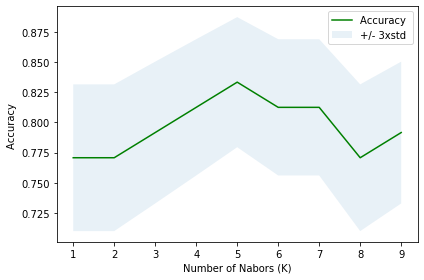

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8333333333333334 with k= 5
